In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

Ανάλυση και Σχεδιασμός Πληροφοριακών Συστημάτων - Εξαμηνιαία Εργασία <br>
Μαργαρίτα Τσαρμποπούλου<br>
Σμαραγδή Μπενέτου<br>
Νόνη Στράτη<br>

# Φόρτωση συνόλου δεδομένων - Book Crossing Dataset

In [2]:
users=pd.read_csv('/kaggle/input/bookcrossing-dataset/Book reviews/Book reviews/BX-Users.csv',delimiter=';',encoding='iso-8859-1')
split_location = users['Location'].str.split(',', expand=True)
users['City'] = split_location[0]
users['State'] = split_location[1]
users['Country'] = split_location[2]
users['State'] = users['State'].replace('n/a', None)
users.head()

,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


In [3]:
ratings=pd.read_csv('/kaggle/input/bookcrossing-dataset/Book reviews/Book reviews/BX-Book-Ratings.csv',delimiter=';',encoding='iso-8859-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
books=pd.read_csv('/kaggle/input/bookcrossing-dataset/Book reviews/Book reviews/BX_Books.csv',delimiter=';',encoding='iso-8859-1', error_bad_lines=False)
books.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
data=pd.read_csv('/kaggle/input/bookcrossing-dataset/Books Data with Category Language and Summary/Preprocessed_data.csv',encoding='iso-8859-1')
data.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


# Ανάλυση Χαρακτηριστικών του συνόλου δεδομένων

In [6]:
num_books = len(books)
num_users = len(users)
num_ratings = len(ratings)

print("Number of books: ", num_books)
print("Number of users: ", num_users)
print("Number of ratings: ", num_ratings)

Number of books:  271379
Number of users:  278858
Number of ratings:  1149780


In [7]:
print('Ratings summary statistics:\n', ratings.describe())

Ratings summary statistics:
             User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


In [8]:
print("Users shape:", users.shape)
print("Book ratings shape:", ratings.shape)
print("Books shape:", books.shape)

Users shape: (278858, 6)
Book ratings shape: (1149780, 3)
Books shape: (271379, 8)


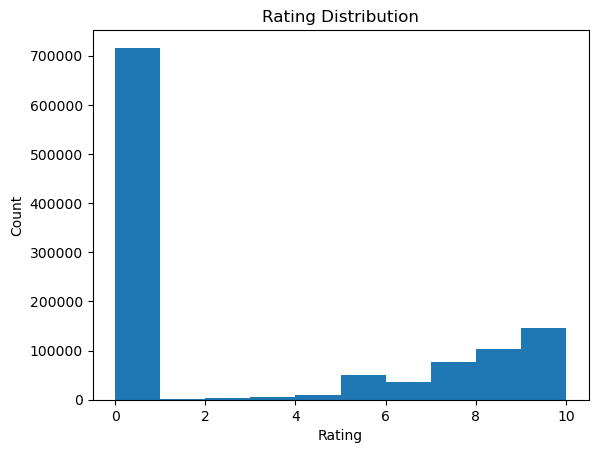

In [9]:
import matplotlib.pyplot as plt

# plot the rating distribution
plt.hist(ratings['Book-Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

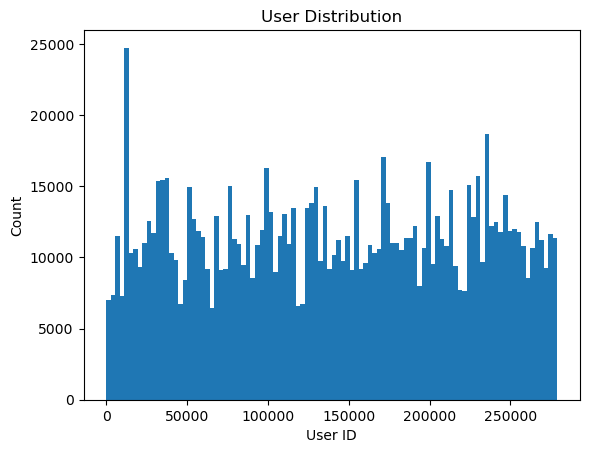

In [10]:
# plot the user distribution
plt.hist(ratings['User-ID'], bins=100)
plt.xlabel('User ID')
plt.ylabel('Count')
plt.title('User Distribution')
plt.show()

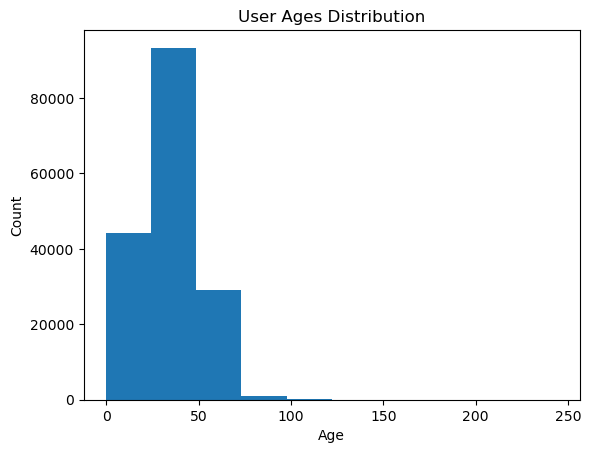

In [11]:
#User Ages Distribution
plt.hist(users['Age'].dropna(), bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('User Ages Distribution')
plt.show()

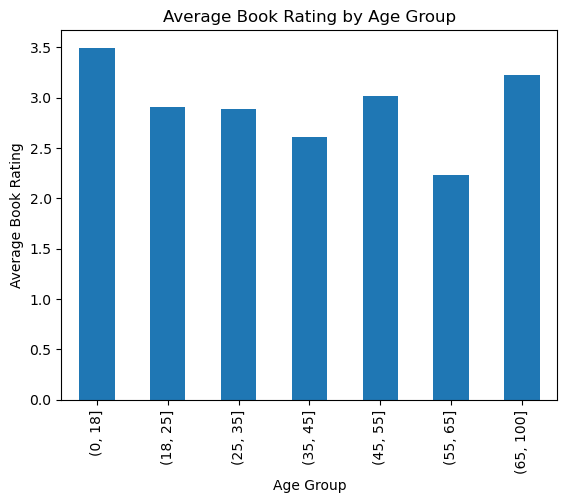

In [12]:
# Distribution of book ratings by age group
age_groups = pd.cut(data['age'], bins=[0, 18, 25, 35, 45, 55, 65, 100])
age_group_ratings = data.groupby(age_groups)['rating'].mean()
age_group_ratings.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Book Rating')
plt.title('Average Book Rating by Age Group')
plt.show()

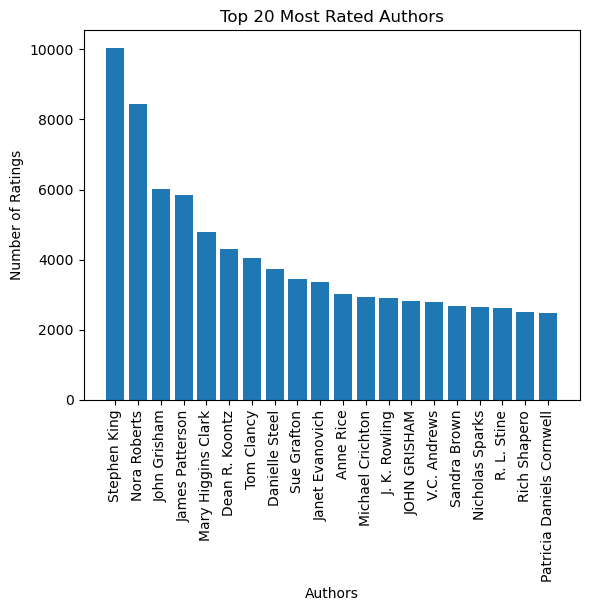

In [13]:
#Distribution of Book Ratings by Author
author_ratings = data.groupby('book_author')['rating'].count().sort_values(ascending=False)
plt.bar(range(20), author_ratings[:20])
plt.title('Top 20 Most Rated Authors')
plt.xticks(range(20), author_ratings[:20].index, rotation=90)
plt.xlabel('Authors')
plt.ylabel('Number of Ratings')
plt.show()

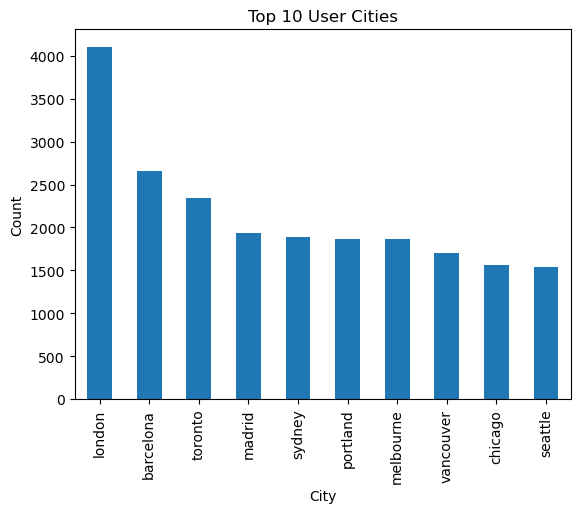

In [14]:
# Distribution of users by City
users_city = users.dropna(subset=['City'])
top_cities = users_city['City'].value_counts()[:10]
top_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 User Cities')
plt.show()

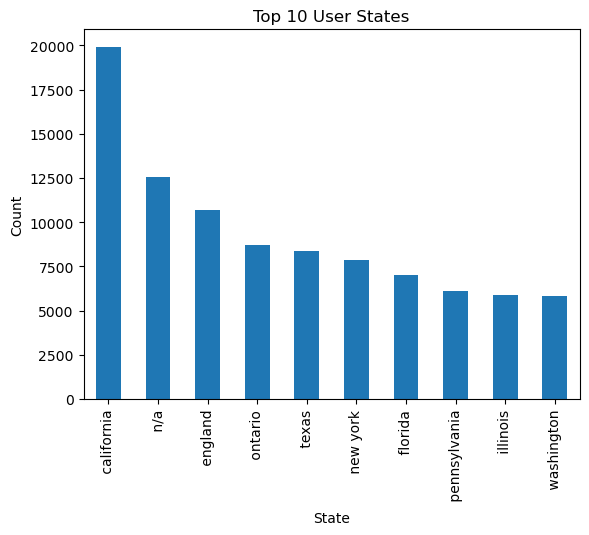

In [15]:
# Distribution of users by State

##########εδω πρεπει να βγαλουμε το n/a
users_state = users.dropna(subset=['State'])
top_states = users_state['State'].value_counts()[:10]
top_states.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 User States')
plt.show()

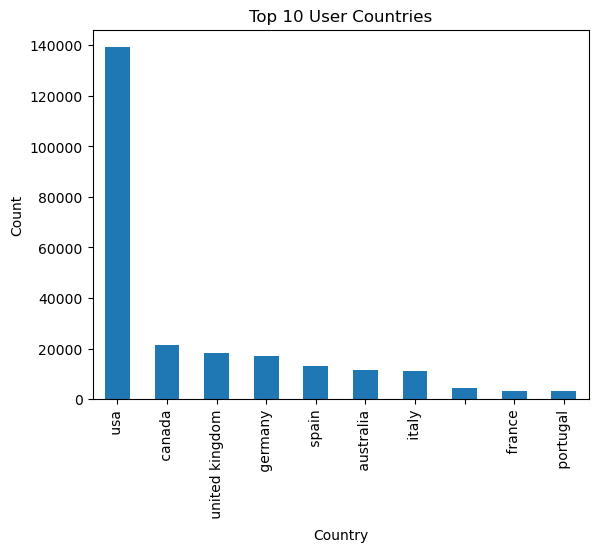

In [16]:
# Distribution of users by Country
##########εδω πρεπει να βγαλουμε το '  '
users_country = users.dropna(subset=['Country'])
top_countries = users_country['Country'].value_counts()[:10]
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 User Countries')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


Text(0.5, 1.0, 'Rating Distribution')

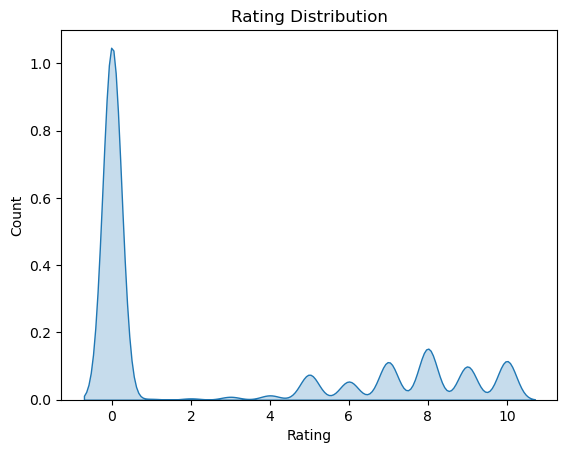

In [17]:
# KDE plot 
sns.kdeplot(ratings['Book-Rating'], shade=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')

In [18]:
print('Data shape:', data.shape)
print('Data head:\n', data.head())

Data shape: (1031175, 19)
Data head:
    Unnamed: 0  user_id                   location      age        isbn  \
0           0        2  stockton, california, usa  18.0000  0195153448   
1           1        8   timmins, ontario, canada  34.7439  0002005018   
2           2    11400    ottawa, ontario, canada  49.0000  0002005018   
3           3    11676              n/a, n/a, n/a  34.7439  0002005018   
4           4    41385   sudbury, ontario, canada  34.7439  0002005018   

   rating           book_title           book_author  year_of_publication  \
0       0  Classical Mythology    Mark P. O. Morford               2002.0   
1       5         Clara Callan  Richard Bruce Wright               2001.0   
2       0         Clara Callan  Richard Bruce Wright               2001.0   
3       8         Clara Callan  Richard Bruce Wright               2001.0   
4       0         Clara Callan  Richard Bruce Wright               2001.0   

                 publisher                            

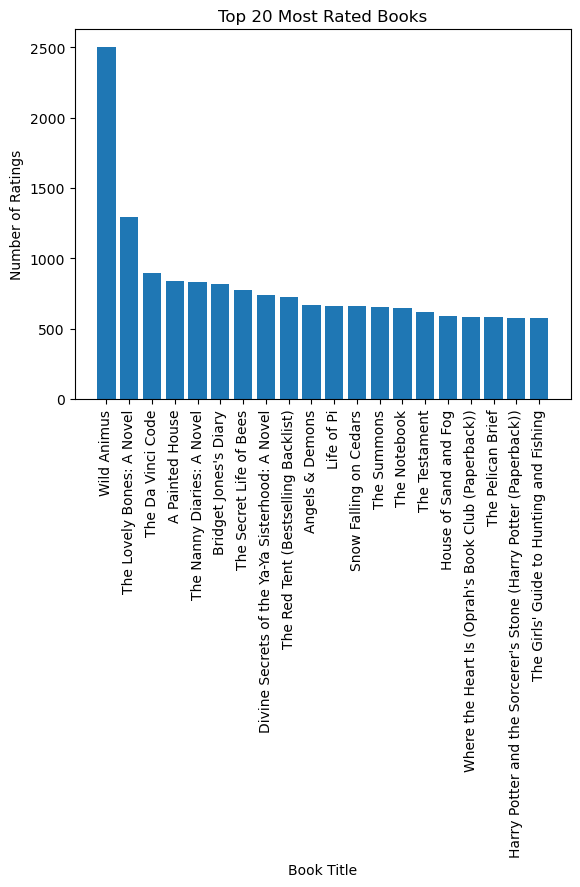

In [19]:
rating_counts = data.groupby('book_title')['rating'].count().sort_values(ascending=False)
plt.bar(range(20), rating_counts[:20])
plt.title('Top 20 Most Rated Books')
plt.xticks(range(20), rating_counts[:20].index, rotation=90)
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.show()

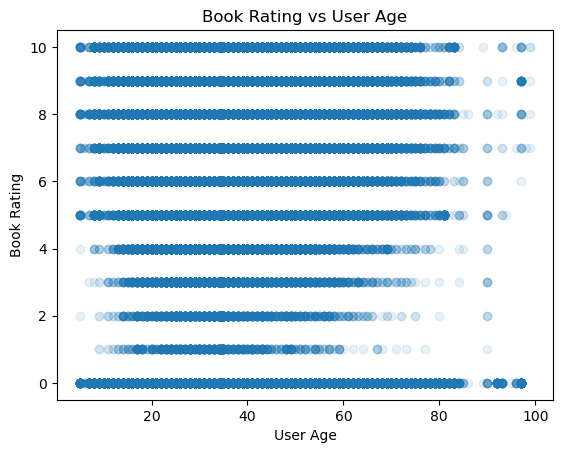

In [20]:
plt.scatter(data['age'], data['rating'], alpha=0.1)
plt.title('Book Rating vs User Age')
plt.xlabel('User Age')
plt.ylabel('Book Rating')
plt.show()

# 2

In [21]:
ratings = ratings[['User-ID', 'ISBN', 'Book-Rating']]
users = users[['User-ID']]
books = books[['ISBN', 'Book-Title', 'Book-Author']]
data = data[['user_id', 'isbn', 'rating']]

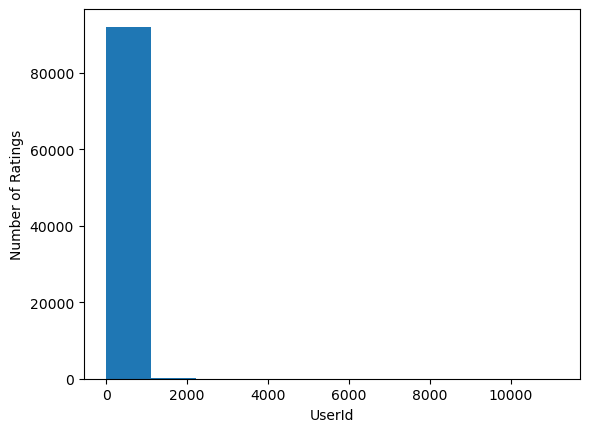

In [22]:
user_ratings_count = data['user_id'].value_counts()
plt.hist(user_ratings_count, bins=10)
plt.ylabel('Number of Ratings')
plt.xlabel('UserId')
plt.show()

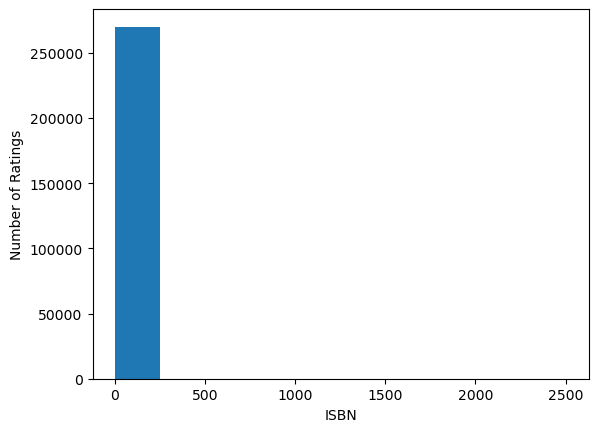

In [23]:
book_ratings_count = data['isbn'].value_counts()
plt.hist(book_ratings_count, bins=10)
plt.ylabel('Number of Ratings')
plt.xlabel('ISBN')
plt.show()

In [24]:
user_ratings_count

11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
          ...  
120602        1
68986         1
41015         1
52228         1
278729        1
Name: user_id, Length: 92107, dtype: int64

In [25]:
book_ratings_count

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0773758704       1
1551431408       1
0706412796       1
0060556056       1
1569661057       1
Name: isbn, Length: 270170, dtype: int64

In [26]:
data['user_id'].unique()

array([     2,      8,  11400, ..., 278713, 278714, 278729])

In [27]:
data['isbn'].unique()

array(['0195153448', '0002005018', '0060973129', ..., '0884159221',
       '0912333022', '1569661057'], dtype=object)

# Προεπεξεργασία δειγμάτων

In [28]:
user_ratings_count.mean()

11.19540317239732

In [29]:
book_ratings_count.mean()

3.8167635192656477

Σβήνουμε χρήστες που έχουν αξιολογήσει αριθμό βιβλίων μικρότερο του μέσου όρου όπως και βιβλία που έχουν αξιολογηθεί από αριθμό χρηστών μικρότερο του μέσου όρου. Αυτό γιατί οι χρήστες αυτοί δεν παρέχουν αρκετά δεδομένα για να μπορέσουμε να βρούμε παρόμοιους χρήστες και γιατί οι αξιολογήσεις τους ίσως να μην είναι αξιόπιστες. Επίσης τα βιβλία με ελάχιστες αξιολογήσεις δεν μπορούν να χρησιμοποιηθούν γιατί δεν έχουμε αρκετά δεδομένα για να βγάλουμε συμπεράσματα και να το προτείνουμε. 

In [30]:
min_book_ratings = 30
min_user_ratings = 20

book_ratings_counts = data['isbn'].value_counts()
data = data[data['isbn'].isin(book_ratings_counts[book_ratings_counts >= min_book_ratings].index)]

user_ratings_counts = data['user_id'].value_counts()
data = data[data['user_id'].isin(user_ratings_counts[user_ratings_counts >= min_user_ratings].index)]

Νέος μέσος όρος πολύ μεγαλύτερος καθώς υπήρχε πολύ μεγάλη ανισοκατανομή

In [31]:
user_ratings_count = data['user_id'].value_counts()
user_ratings_count.mean()

74.41346153846153

In [32]:
book_ratings_count = data['isbn'].value_counts()
book_ratings_count.mean()

45.05705635770843

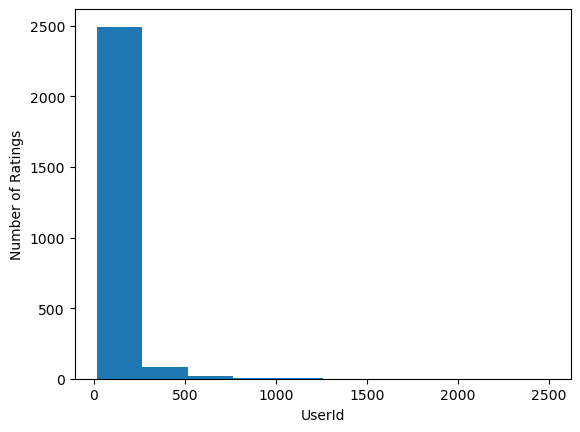

In [33]:
user_ratings_count = data['user_id'].value_counts()
plt.hist(user_ratings_count, bins=10)
plt.ylabel('Number of Ratings')
plt.xlabel('UserId')
plt.show()

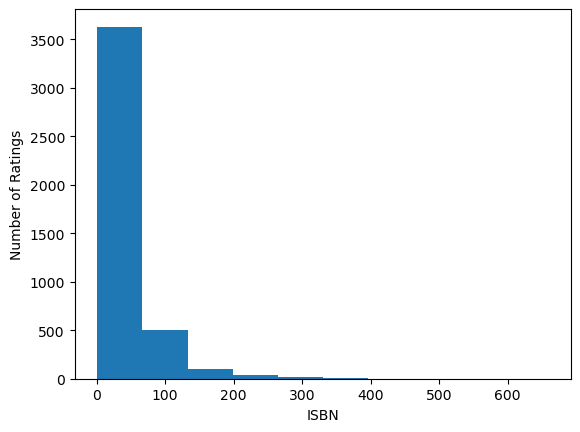

In [34]:
book_ratings_count = data['isbn'].value_counts()
plt.hist(book_ratings_count, bins=10)
plt.ylabel('Number of Ratings')
plt.xlabel('ISBN')
plt.show()

Δημιουργούμε δύο πίνακες που περιέχουν μόνο χρήστες και αξιολογήσεις για κάθε διαθέσιμο βιβλίο και το αντίθετο, καθώς το collabotive filtering δεν λαμβάνει υπόψη περιεχόμενο μόνο συσχέτιση χρηστών ή αντικειμένων.

In [35]:
book_ratings = data.pivot_table(index='user_id', columns='isbn', values='rating').fillna(0)
book_ratings_mean = book_ratings.mean(axis=0)
book_ratings_normalized = book_ratings - book_ratings_mean

In [36]:
user_ratings = data.pivot_table(index='isbn', columns='user_id', values='rating').fillna(0)
user_ratings_mean = user_ratings.mean(axis=1)
user_ratings_normalized = user_ratings.subtract(user_ratings_mean, axis=0)

In [37]:
book_ratings_normalized.head()

isbn,000649840X,0006547834,0006550789,0007110928,0007154615,0020198906,0020199600,002026478X,0020427859,0020442009,...,3492045170,3492238696,3548359698,3596259924,3746614007,8408043641,8495618605,8806142100,8807813025,8845205118
user_id,,,,,,,,,,,,,,,,,,,,,
243,-0.030385,-0.012308,-0.017308,-0.018077,-0.022692,-0.026154,-0.031154,-0.017308,-0.023077,-0.023462,...,-0.006538,-0.003077,-0.003077,-0.007308,-0.003846,-0.001923,-0.001154,-0.006154,-0.003462,0.0
254,-0.030385,-0.012308,-0.017308,-0.018077,-0.022692,-0.026154,-0.031154,-0.017308,-0.023077,-0.023462,...,-0.006538,-0.003077,-0.003077,-0.007308,-0.003846,-0.001923,-0.001154,-0.006154,-0.003462,0.0
487,-0.030385,-0.012308,-0.017308,-0.018077,-0.022692,-0.026154,-0.031154,-0.017308,-0.023077,-0.023462,...,-0.006538,-0.003077,-0.003077,-0.007308,-0.003846,-0.001923,-0.001154,-0.006154,-0.003462,0.0
507,-0.030385,-0.012308,-0.017308,-0.018077,-0.022692,-0.026154,-0.031154,-0.017308,8.976923,-0.023462,...,-0.006538,-0.003077,-0.003077,-0.007308,-0.003846,-0.001923,-0.001154,-0.006154,-0.003462,0.0
638,-0.030385,-0.012308,-0.017308,-0.018077,-0.022692,-0.026154,-0.031154,-0.017308,-0.023077,-0.023462,...,-0.006538,-0.003077,-0.003077,-0.007308,-0.003846,-0.001923,-0.001154,-0.006154,-0.003462,0.0


Παρατηρούμε τη μεγάλη διαστατικότητα του πίνακα. Αυτή θα μειωθεί με svd ώστε να μειώσουμε τις διαστάσεις και να μπορέσουμε να ανιχνεύσουμε ομοιότητες χρηστών πιο εύκολα.

# Διαχωρισμός σε σύνολο εκπαίδευσης και τεστ

Διαχωρίζουμε τα δεδομένα σε πίνακα με τα χαρακτηριστικά και πίνακα με τους στόχους 

In [38]:
features = data.iloc[:, [0,1]].values

In [39]:
targets = data.iloc [:, 2].values

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds)

For loop θα εκτελεστεί 5 φορές μία για κάθε πιθανό test υποσύνολο. Δεν έγινε με cross validation η εκπαίδευση καθώς η εκτίμηση στο σύνολο τεστ παίρνει πολλές ώρες. Ωστόσο, αν γινόταν θα εκτελούνταν τα απρακάτω βήματα για κάθε διαφορετικό διαχωρισμό του συνόλου δεδομένων σε σύνολο τεστ και εκπαίδευσης και θα επιλεγόνταν η διάσταση που θα είχε τον καλύτερο μέσο όρο εκτίμησης σε όλες τις επαναλήψεις του k-fold cross validation.

In [41]:
for train_index,test_index in kf.split(features):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = features[train_index], features[test_index], targets[train_index], targets[test_index]


Train Index:  [ 38695  38696  38697 ... 193472 193473 193474] 

Test Index:  [    0     1     2 ... 38692 38693 38694]
Train Index:  [     0      1      2 ... 193472 193473 193474] 

Test Index:  [38695 38696 38697 ... 77387 77388 77389]
Train Index:  [     0      1      2 ... 193472 193473 193474] 

Test Index:  [ 77390  77391  77392 ... 116082 116083 116084]
Train Index:  [     0      1      2 ... 193472 193473 193474] 

Test Index:  [116085 116086 116087 ... 154777 154778 154779]
Train Index:  [     0      1      2 ... 154777 154778 154779] 

Test Index:  [154780 154781 154782 ... 193472 193473 193474]


Χωρίζουμε σε σύνολο τεστ και εκπαίδευσης

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  features, targets, test_size=0.05, random_state=42)

Δημιουργούμε ψεύτικο isbn για να περάσουμε όλους τους χρήστες στο σύνολο εκπαίδευσης και να βεβαιωθούμε ότι υπάρχουν εκεί

In [43]:
#for i in range(len(book_ratings)) :
#    X_train = np.append(X_train, np.array([[book_ratings.index[i], '000000']]), axis=0)
#    y_train = np.append(y_train, 0)
        

Δημιουργούμε το pivot table από το σύνολο εκπαίδευσης αφού συνενώσουμε σε dataframe τα X_train και y_train

In [44]:
train = pd.DataFrame(X_train, columns=["user_id", "isbn"])
trainy = pd.DataFrame(y_train,columns=["book_ratings"])
train["book_ratings"] = trainy["book_ratings"]
train_pivot = train.pivot_table(index='user_id', columns='isbn', values='book_ratings').fillna(0)
mean = train_pivot.mean(axis=0)
train_pivot_normalized = train_pivot - mean

In [45]:
#train_pivot_normalized.to_csv('train_pivot_norm.csv')

In [46]:
#data.to_csv("data,csv")

In [47]:
#train.to_csv("train1.csv")


In [48]:
from numpy import save, load
#save('X_test.npy', X_test)
#save('y_test.npy', y_test)

# Εκπαίδευση και εκτίμηση

Υπολογίζουμε τον SVD πάνω στο κανονικοποιημένο pivot table

In [49]:
from scipy.linalg import svd
U_train,S_train,VT_train = svd(train_pivot_normalized)

Δημιουργούμε τους πίνακες για τις διάφορες διαστάσεις

In [50]:

U10 = pd.DataFrame(U_train[:,:10])
'''
U20 = pd.DataFrame(U_train[:,:20])
U30 = pd.DataFrame(U_train[:,:30])
U40 = pd.DataFrame(U_train[:,:40])
VT10 = pd.DataFrame(VT[:10,:])
VT20 = pd.DataFrame(VT[:20,:])
VT30 = pd.DataFrame(VT[:30,:])
'''

'\nU20 = pd.DataFrame(U_train[:,:20])\nU30 = pd.DataFrame(U_train[:,:30])\nU40 = pd.DataFrame(U_train[:,:40])\nVT10 = pd.DataFrame(VT[:10,:])\nVT20 = pd.DataFrame(VT[:20,:])\nVT30 = pd.DataFrame(VT[:30,:])\n'

In [51]:
'''
U10.to_csv('U10.csv')
U20.to_csv('U20.csv')
U30.to_csv('U30.csv')
VT10.to_csv('VT10.csv')
VT20.to_csv('VT20.csv')
VT30.to_csv('VT30.csv')
pd.DataFrame(S).to_csv('S.csv')
'''

"\nU10.to_csv('U10.csv')\nU20.to_csv('U20.csv')\nU30.to_csv('U30.csv')\nVT10.to_csv('VT10.csv')\nVT20.to_csv('VT20.csv')\nVT30.to_csv('VT30.csv')\npd.DataFrame(S).to_csv('S.csv')\n"

Προσθέτουμε την στήλη user_id για την αντιστοίχηση στην εκτίμηση

In [52]:

U10["user_id"] = train_pivot_normalized.index
'''
U20["user_id"] = train_pivot_normalized.index
#U30["user_id"] = train_pivot_normalized.index
#U40["user_id"] = train_pivot_normalized.index
'''

'\nU20["user_id"] = train_pivot_normalized.index\n#U30["user_id"] = train_pivot_normalized.index\n#U40["user_id"] = train_pivot_normalized.index\n'

Δημιουργούμε το pivot table ξανά χωρίς να μηδενίσουμε τα null στοιχεία καθώς θέλουμε στην εκτίμηση να χρησιμοποιήσουμε μόνο τις πραγματικές μηδενικές αξιολογήσεις.

In [53]:
book_ratings_withnull = train.pivot_table(index='user_id', columns='isbn', values='book_ratings')

Η εκτίμηση γίνεται με την weighted average μετρική πάνω στο σύνολο των χρηστών που έχουν βαθμολογήσει το συγκεκριμένο βιβλίο.

In [54]:
def cosine_similarity(v,u):
    return (v @ u)/ (np.linalg.norm(v) * np.linalg.norm(u))
def product_similarity(v,u):
    return np.dot(v,u)

In [55]:

def predict(user, book, U):
    #user is with user_id and book with isbn
    sim = []
    num = 0
    #convert user_id to index from U 
    user_index = U[U["user_id"] == user].index.to_numpy()[0]
    for u in range(len(U)):
        if np.isnan(book_ratings_withnull.iloc[u][book]):
            continue
        if user_index != u:
            sim.append(cosine_similarity(U10.iloc[user_index].to_numpy(), U10.iloc[u].to_numpy()))
            num += sim[-1]*book_ratings_withnull.iloc[u][book]
    l1_norm = sum(abs(x) for x in sim)
    pred = num/l1_norm
    return pred


Κάνουμε μία εκτίμηση για ένα δείγμα του συνόλου τεστ και παρατηρούμε ότι είναι πολύ κοντά στην πραγματική τιμή.

In [56]:
cosine_similarity(U10.iloc[2].to_numpy(), U10.iloc[4].to_numpy())

0.9999999896036184

In [69]:
predict(X_test[7][0], X_test[7][1], U10)

4.380952380340114

In [70]:
for i in range(len(y_test)):
    print(y_test[i])

0
0
5
0
0
0
0
10
8
0
0
9
0
0
7
0
0
0
0
10
0
0
0
0
0
0
8
10
0
0
0
8
0
0
5
8
8
0
0
7
9
0
0
8
0
0
10
6
10
10
0
5
0
0
0
9
0
7
6
0
0
0
0
5
0
8
0
0
10
0
0
0
8
7
0
0
0
9
0
0
0
0
0
0
0
10
0
0
0
0
7
0
9
0
0
0
0
0
0
0
6
0
0
0
0
7
0
0
0
7
0
0
0
0
0
0
0
9
0
0
0
0
7
0
0
0
0
0
6
5
0
0
0
10
0
7
0
0
0
0
9
0
0
0
0
0
0
8
0
0
0
0
0
0
8
0
8
0
0
0
0
10
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
8
8
0
0
9
0
5
0
0
9
0
0
0
0
7
0
0
0
5
0
10
0
0
0
0
0
7
9
9
10
0
0
0
0
9
0
0
0
8
0
0
0
0
9
0
0
0
0
0
0
0
8
0
0
10
0
0
8
0
0
10
9
7
0
8
0
0
0
0
0
0
0
0
7
5
0
0
0
10
0
0
0
0
0
9
0
0
0
0
0
0
0
4
0
6
0
0
4
6
0
0
0
8
0
8
0
0
5
0
0
0
0
5
10
0
5
0
0
0
9
0
0
0
10
0
0
0
0
0
0
0
10
0
6
8
0
0
0
8
0
0
0
0
0
0
7
0
0
0
0
0
7
0
0
0
0
0
0
0
0
0
0
0
8
9
0
8
0
0
0
6
10
0
0
0
0
0
8
6
0
0
6
10
0
0
0
0
0
10
0
6
0
10
6
0
9
0
0
8
0
0
0
7
0
0
0
9
0
0
10
0
0
0
0
5
0
8
0
0
0
0
8
0
0
10
8
0
0
0
0
0
0
8
0
9
5
0
0
7
10
9
7
0
8
0
0
0
9
0
0
0
0
0
0
0
10
0
0
0
0
8
0
0
9
5
5
0
7
10
0
0
7
0
0
6
0
0
10
0
0
6
0
8
0
7
0
0
0
10
0
0
9
7
7
0
0
0
0
10
0
0
5
0
0
8
0

Υπολογιμός RMSE της εκτίμησης σε όλο το τεστ σύνολο

In [ ]:
from tqdm import tqdm
def test_error(X, y, U) :
    mse = 0
    for i in tqdm(range(len(X))) :
        error = y[i] - predict(X[i][0], X[i][1], U)
        mse += (error)**2
        #print("Error for sample {}: {} \n".format(i,error))
    return np.root(mse/len(X))

In [ ]:
#test_error(X_test, y_test, U40)